In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
data.columns.tolist()

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

### Features

In [5]:
data = data.loc[:,  ['Make',
                     'Model',
                     'Year',
                     'Engine HP',
                     'Engine Cylinders',
                     'Transmission Type',
                     'Vehicle Style',
                     'highway MPG',
                     'city mpg',
                     'MSRP']
               ]

### Data preparation

In [6]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.fillna(0, inplace=True)
data.rename(columns={'msrp': 'price'}, inplace=True)

data.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

In [7]:
data.transmission_type.value_counts(dropna=False).index[0]

'AUTOMATIC'

### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

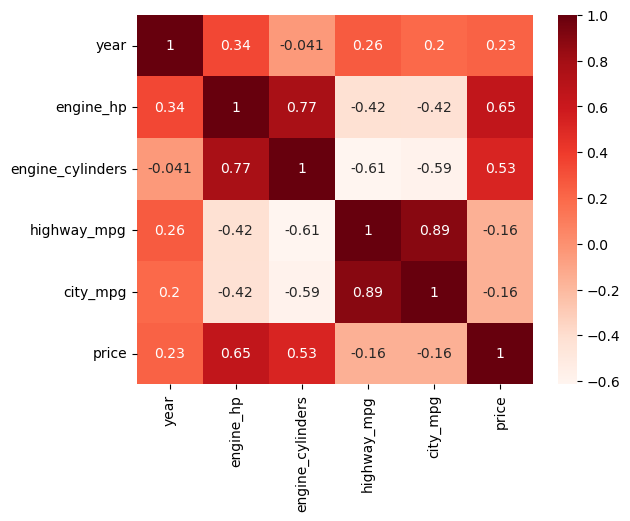

In [8]:
numerical_features = ['year',
                     'engine_hp',
                     'engine_cylinders',
                     'highway_mpg',
                     'city_mpg',
                     'price']


corr_data = data[numerical_features].corr()

sns.heatmap(corr_data, annot=True, cmap="Reds")
plt.show()

In [9]:
corr_data.unstack().sort_values(ascending=False)

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
                  highway_mpg         0.258240
highway_mpg       year                0.258240
year              price               0.227590
price             year                0.227590
year              city_mpg            0.198171
city_mpg     

### Make price binary

- Now we need to turn the `price` variable from numeric into a binary format.
- Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [10]:
data['above_average'] = (data['price'] > data['price'].mean()).astype(int)

### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split function`) and set the seed to `42`.
- Make sure that the target value (`above_average`) is not in your dataframe.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [13]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train_bin = df_train.above_average.values
y_val_bin = df_val.above_average.values
y_test_bin = df_test.above_average.values

y_train_cont = df_train.price.values
y_val_cont = df_val.price.values
y_test_cont = df_test.price.values

df_train.drop(['price', 'above_average'], axis=1, inplace=True)
df_val.drop(['price', 'above_average'], axis=1, inplace=True)
df_test.drop(['price', 'above_average'], axis=1, inplace=True)

### Question 3

- Calculate the mutual information score between `above_average` and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
def mutual_info_above_average_score(series):
    return round(mutual_info_score(series, y_train_bin), 2)

In [18]:
categorical_features = ['make',
                         'model',
                         'transmission_type',
                         'vehicle_style']

mi = df_train[categorical_features].apply(mutual_info_above_average_score)
mi.sort_values(ascending=True)

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [19]:
#One-hot encoding
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model.fit(X_train, y_train_bin)

y_pred = model.predict(X_val)
print(f"calculated accuracy score: {round((y_pred == y_val_bin).mean(),2)}")
accuracy = round(accuracy_score(y_val_bin, y_pred),2)
print(f"sklearn accuracy_score: {accuracy}")

calculated accuracy score: 0.95
sklearn accuracy_score: 0.95


### Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?


- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

In [21]:
features = df_train.columns.tolist()

original_accuracy = accuracy

print(f"Original accuracy: {original_accuracy}")

results = []

# feature elimination technique
for eliminated_feature in features:
    model_features = features.copy()
    model_features.remove(eliminated_feature)

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[model_features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[model_features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

    model.fit(X_train, y_train_bin)

    y_pred = model.predict(X_val)

    model_accuracy = accuracy_score(y_val_bin, y_pred)
    
    results.append([eliminated_feature, model_accuracy, abs(original_accuracy - model_accuracy)])

feature_elimination_results = pd.DataFrame(results, columns = ['Eliminated Feature', 'Accuracy', 'Accuracy Diff'])

feature_elimination_results.sort_values(by=['Accuracy Diff'], ascending=True)

Original accuracy: 0.95


,Eliminated Feature,Accuracy,Accuracy Diff
2,year,0.947125,0.002875
0,make,0.946706,0.003294
7,highway_mpg,0.946706,0.003294
8,city_mpg,0.945867,0.004133
4,engine_cylinders,0.945447,0.004553
5,transmission_type,0.940411,0.009589
6,vehicle_style,0.932018,0.017982
3,engine_hp,0.922786,0.027214
1,model,0.919429,0.030571


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

y_train_log = np.log1p(y_train_cont)
y_val_log = np.log1p(y_val_cont)

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)
    
    y_pred = model.predict(X_val)
    
    # 'squared' paramenter if True returns MSE value, if False returns RMSE value.
    rmse_score = mean_squared_error(y_val_log, y_pred, squared=False)
    
    print(f"RMSE (alpha={a}): {round(rmse_score,3)}")

/home/lbdemoraes/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE (alpha=0): 0.487


/home/lbdemoraes/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE (alpha=0.01): 0.487


/home/lbdemoraes/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE (alpha=0.1): 0.487


/home/lbdemoraes/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE (alpha=1): 0.487
RMSE (alpha=10): 0.487


/home/lbdemoraes/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
